In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import h5py
from keras import optimizers
from keras.models import Model 
from keras import layers

Using TensorFlow backend.


Load training, validation, and testing data. Convert to nummpy array, add singleton dimension in channel position (1 channel -- grayscale). Edit path as needed. Note that a warning may appear about expand_dims using deprecated functions -- ignore it or swap expand_dims with X_test[:,:,:, np.newaxis]

In [3]:
datapath = './data/Pneumothorax.h5'

with h5py.File(datapath,'r') as f:
    X_test = np.expand_dims( np.array(f.get('input_test')) , 3).astype(np.float32)
    Y_test = np.expand_dims( np.array(f.get('target_test')) , 3).astype(np.float32)   
    X_train = np.expand_dims( np.array(f.get('input_train')) , 3).astype(np.float32)  
    Y_train = np.expand_dims( np.array(f.get('target_train')) , 3).astype(np.float32)   
    X_val =  np.expand_dims( np.array(f.get('input_val')) , 3).astype(np.float32)   
    Y_val = np.expand_dims( np.array(f.get('target_val')) , 3).astype(np.float32)

/Users/zhangjinnian/miniconda2/envs/jinnian/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """
/Users/zhangjinnian/miniconda2/envs/jinnian/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  import sys
/Users/zhangjinnian/miniconda2/envs/jinnian/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  if __name__ == '__main__':


Show one image

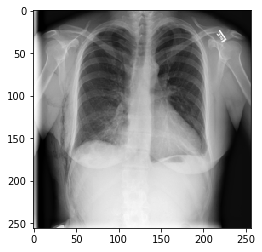

In [19]:
img = np.squeeze(X_train[100].T)

plt.figure()
plt.imshow(img, cmap="gray")

I'll start your network, you build the rest:

In [4]:
img_input = layers.Input(shape=(256, 256, 1))

Hint: the final layer should have linear activation with 1 output

In [5]:
x = layers.Conv2D(128, (3, 3), strides=(4,4), padding='same', kernel_initializer='he_normal')(img_input)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D((2, 2), strides=None)(x)
x = layers.Conv2D(256, (3, 3), strides=(4,4), padding='same', kernel_initializer='he_normal')(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D((2, 2), strides=None)(x)
x = layers.Conv2D(512, (3, 3), strides=(4,4), padding='same', kernel_initializer='he_normal')(x)
x = layers.Activation('relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(100, activation='relu', kernel_initializer='he_normal')(x)
x = layers.Dense(1, activation='linear')(x)

Create model

In [6]:
model = Model(inputs=img_input, outputs=x)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       1280      
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
activation_2 (Activation)    (None, 8, 8, 256)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
__________

Use the "mean_squared_error" loss function (or try something different! Look up Keras loss functions on Google). Monitor the "mse" metric.

In [7]:
model.compile(loss = "mean_squared_error", optimizer = optimizers.Adam(lr=1e-5), metrics=["mse"])

Fit the model. Modify the epochs/batch_size as needed.

In [8]:
history = model.fit(x=X_train, y=Y_train, batch_size=15, epochs=5,
                   validation_data = (X_val, Y_val), shuffle=True)

Train on 3712 samples, validate on 795 samples
Epoch 1/5
3712/3712 [==============================] - 51s 14ms/step - loss: 7395.9863 - mean_squared_error: 7395.9863 - val_loss: 662.1609 - val_mean_squared_error: 662.1609
Epoch 2/5
3712/3712 [==============================] - 52s 14ms/step - loss: 672.9839 - mean_squared_error: 672.9839 - val_loss: 560.4992 - val_mean_squared_error: 560.4992
Epoch 3/5
3712/3712 [==============================] - 54s 14ms/step - loss: 570.9233 - mean_squared_error: 570.9233 - val_loss: 542.5448 - val_mean_squared_error: 542.5448
Epoch 4/5
3712/3712 [==============================] - 53s 14ms/step - loss: 493.9146 - mean_squared_error: 493.9146 - val_loss: 477.5042 - val_mean_squared_error: 477.5042
Epoch 5/5
3712/3712 [==============================] - 58s 16ms/step - loss: 452.1994 - mean_squared_error: 452.1994 - val_loss: 476.8325 - val_mean_squared_error: 476.8325


Plot the training/validation loss

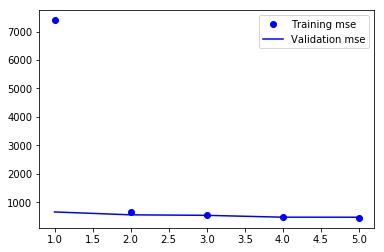

In [9]:
mse = history.history['mean_squared_error']
val_mse = history.history['val_mean_squared_error']   #validation
epochs = range(1,len(mse)+1)
plt.plot(epochs,mse,'bo', label='Training mse')
plt.plot(epochs,val_mse,'b', label='Validation mse')
plt.legend()
plt.show()

This is the code to use to evaluate your network -- don't change it. Take a screen shot of the output to submit to the competition! (everyone should submit)

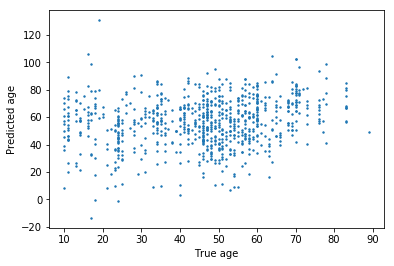

Correlation coefficient: 0.20636185414455985


In [10]:
Y_pred = model.predict(X_test, batch_size=30)   
Y_pred = np.squeeze(Y_pred)  #remove the singleton dimension for analysis
Y_test = np.squeeze(Y_test)  
plt.scatter(Y_test, Y_pred, s=2)
plt.xlabel('True age')
plt.ylabel('Predicted age')
plt.show()
corr = np.corrcoef(Y_pred, Y_test)   #get correlation matrix
print("Correlation coefficient: " + str(corr[0,1]))